In [1]:
from simulator.config import generate_cond
from sklearn.model_selection import train_test_split
from simulator.config import generate_every_world_configuration
from generate_passive_simulations import get_configuration_answer
from toddler.models import ValueNetwork
import torch
import numpy as np
from toddler.validate import validate
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
net_params = {"input_dim":10, "hidden_dim":40, "n_layers":4, "output_dim":6, "dropout":0.0}
value_network = ValueNetwork(**net_params).cuda()

In [3]:
every_conf = generate_every_world_configuration()
every_world_answer = np.array(list(map(get_configuration_answer, every_conf)))
n_configurations = len(every_conf)

train_size = 0.7
val_size = 0.15
test_size = 0.15

all_indices = np.arange(n_configurations)                                                     
train_indices, not_train_indices = train_test_split(all_indices, train_size=train_size,        
                                                    random_state=0, stratify=every_world_answer)
val_indices, test_indices = train_test_split(not_train_indices, train_size=0.5,
                                             random_state=0,                                  
                                             stratify=every_world_answer[not_train_indices])

In [13]:
TEST_EPISODES = 100
repeated_test_indices = np.random.choice(test_indices, TEST_EPISODES, replace=True)
test_cond = generate_cond(every_conf[repeated_test_indices])

In [14]:
model_list = glob.glob("*_model")
model_episodes = [int(model.split("_")[0]) for model in model_list]

sorted_model_list = sorted(zip(model_episodes, model_list))
model_episodes = sorted(model_episodes)

In [15]:
avg_length = []
accuracies = []

for _, model_path in tqdm(sorted_model_list):
    value_network.load_state_dict(torch.load(model_path))
    value_network.eval()
    valArgs = (value_network, {}, {}, test_cond, 1, 1, None, False)
    accuracy, trials = validate(*valArgs)
    
    lengths = [len(trial) for trial in trials]
    
    avg_length.append(np.mean(lengths))
    accuracies.append(accuracy)

  0%|          | 0/34 [00:00<?, ?it/s]/home/hector/Dissertation/diss/toddler/RecurrentWorker.py:82: RuntimeWarning: invalid value encountered in true_divide
  policy = np.array(policy) / sum(policy)
/home/hector/Dissertation/diss/toddler/RecurrentWorker.py:84: RuntimeWarning: invalid value encountered in less
  return np.random.choice(possibleActions, p=policy)
100%|██████████| 34/34 [23:02<00:00, 34.72s/it]


In [16]:
d = {"episode": model_episodes, "accuracy": accuracies, "avg_length": avg_length}
df = pd.DataFrame.from_dict(d)
df.set_index("episode")

,accuracy,avg_length
episode,,
0,0.00,1801.00
1000,0.36,1211.84
2000,0.37,1223.33
3000,0.09,1735.17
4000,0.38,1306.74
5000,0.65,838.71
6000,0.70,797.32
7000,0.58,998.20
8000,0.22,1450.80


In [22]:
df.to_hdf("model_validation.h5", key="validation")

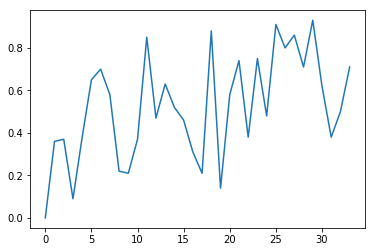

In [20]:
df.accuracy.plot()

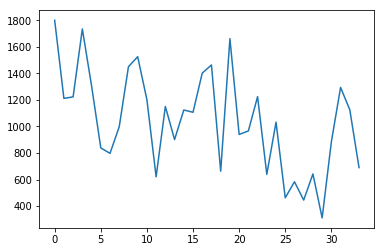

In [18]:
df.avg_length.plot()

# Generating replays with the best model

In [27]:
best_model = int(df.sort_values(by="accuracy").iloc[-1].episode)

In [30]:
best_model = str(best_model) + "_model"

In [31]:
value_network.load_state_dict(torch.load(best_model))
value_network.eval()
valArgs = (value_network, {}, {}, test_cond, 1, 1, "best_replays.h5", True)
accuracy, trials = validate(*valArgs)

----------------------------VALIDATION START-----------------------------------------
1 Control? True done @ 189


/home/hector/Dissertation/diss/toddler/RecurrentWorker.py:82: RuntimeWarning: invalid value encountered in true_divide
  policy = np.array(policy) / sum(policy)
/home/hector/Dissertation/diss/toddler/RecurrentWorker.py:84: RuntimeWarning: invalid value encountered in less
  return np.random.choice(possibleActions, p=policy)


2 Control? True done @ 209
3 Control? True done @ 263
4 Control? True done @ 183
5 Control? False done @ 1800
6 Control? True done @ 27
7 Control? True done @ 265
8 Control? True done @ 345
9 Control? True done @ 205
10 Control? True done @ 125
11 Control? True done @ 97
12 Control? True done @ 11
13 Control? True done @ 35
14 Control? True done @ 109
15 Control? True done @ 207
16 Control? True done @ 229
17 Control? True done @ 427
18 Control? True done @ 67
19 Control? True done @ 207
20 Control? True done @ 49
21 Control? True done @ 139
22 Control? False done @ 1800
23 Control? False done @ 1800
24 Control? True done @ 43
25 Control? True done @ 277
26 Control? True done @ 163
27 Control? True done @ 225
28 Control? True done @ 69
29 Control? True done @ 91
30 Control? True done @ 251
31 Control? False done @ 1800
32 Control? True done @ 45
33 Control? True done @ 17
34 Control? True done @ 13
35 Control? True done @ 163
36 Control? True done @ 145
37 Control? False done @ 1800
38